

**Name:-Ritesh Rajendra Salunkhe**

**Subject:-Practical to data mining**

**Course:-Msc.Data Science and big data analytics**

**Student id:-4497945**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the datasets
df = pd.read_csv('/content/covid_19_data (1).csv', encoding='latin1')
df_modified = pd.read_csv('/content/COVID19_line_list_data_modified (1).csv', encoding='latin1')

In [ ]:
# Display the first few rows of each dataframe to understand their structure
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [ ]:
df_modified.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,NaN,1/3/2020,0,1.0,0,0,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN


In [ ]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3751
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [ ]:
df_modified.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
dtype: int64

In [ ]:
patient_data = df_modified.drop('Unnamed: 3', axis=1)
patient_data.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,NaN,1/3/2020,0,1.0,0,0,NaN
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN


In [ ]:
patient_data['reporting date'].isnull().value_counts()

reporting date
False    1084
True        1
Name: count, dtype: int64

In [ ]:
patient_data = patient_data.dropna(subset=['reporting date'])

In [ ]:
patient_data['reporting date'].isnull().value_counts()

reporting date
False    1084
Name: count, dtype: int64

In [ ]:
patient_data['country'].value_counts()

country
China          197
Japan          189
South Korea    114
Hong Kong       94
Singapore       93
Germany         54
Thailand        41
France          39
Taiwan          34
Spain           34
Malaysia        23
UAE             21
UK              20
Iran            18
USA             18
Bahrain         17
Vietnam         16
Australia       15
Canada          12
Kuwait           9
Italy            3
India            3
Phillipines      3
Austria          2
Russia           2
Sweden           1
Belgium          1
Egypt            1
Finland          1
Israel           1
Lebanon          1
Sri Lanka        1
Cambodia         1
Nepal            1
Afghanistan      1
Algeria          1
Croatia          1
Switzerland      1
Name: count, dtype: int64

In [ ]:
country_counts = patient_data.groupby('country')['country'].count().reset_index(name='counts')

Filter out countries with less than 10 entries

In [ ]:
filt_countries = country_counts[country_counts['counts'] >= 10]

Delete these countries from the original DataFrame

In [ ]:
patient_data = patient_data[(patient_data['country'].isin(filt_countries['country']))]
patient_data['country'].value_counts()

country
China          197
Japan          189
South Korea    114
Hong Kong       94
Singapore       93
Germany         54
Thailand        41
France          39
Taiwan          34
Spain           34
Malaysia        23
UAE             21
UK              20
USA             18
Iran            18
Bahrain         17
Vietnam         16
Australia       15
Canada          12
Name: count, dtype: int64

In [ ]:
df=df.fillna(0)

In [ ]:
patient_data=patient_data.fillna({'age':patient_data['age'].mean(),
'gender':'unknown',
'death':0,
'recovered':0})

In [ ]:
date = ['reporting date', 'hosp_visit_date', 'symptom_onset','exposure_start', 'exposure_end']
for col in date:
  patient_data[col] = pd.to_datetime(patient_data[col], errors='coerce')

In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'], errors='coerce')

In [ ]:
df.fillna('Nan', inplace=True)
df.isnull().value_counts()

SNo    ObservationDate  Province/State  Country/Region  Last Update  Confirmed  Deaths  Recovered
False  False            False           False           False        False      False   False        8509
Name: count, dtype: int64

In [ ]:
patient_data['If_onset_approximated'] = patient_data['If_onset_approximated'].fillna(0)

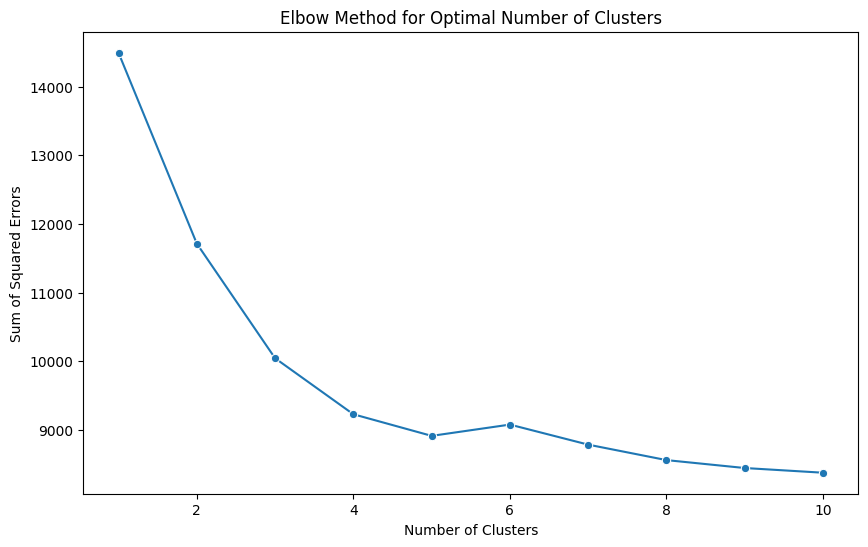

In [ ]:
cluster_data = df[['Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
cluster_data_encoded = pd.get_dummies(cluster_data, columns=['Province/State', 'Country/Region'])

# Finding the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cluster_data_encoded.drop(['Confirmed', 'Deaths', 'Recovered'], axis=1))
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=sse, marker='o', palette='viridis')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

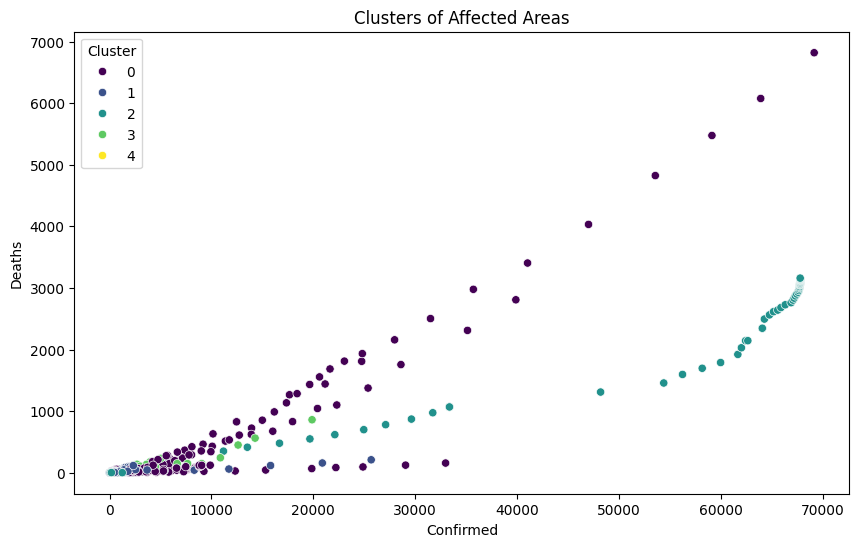

In [ ]:
# From the elbow plot, we choose the optimal number of clusters
optimal_clusters = 5 # This is an example, you should choose based on the plot
cluster_data = df[['Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
cluster_data_encoded = pd.get_dummies(cluster_data, columns=['Province/State', 'Country/Region'])

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(cluster_data_encoded.drop(['Confirmed', 'Deaths', 'Recovered'], axis=1))
cluster_data['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confirmed', y='Deaths', hue='Cluster', palette='viridis', data=cluster_data)
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Clusters of Affected Areas')
plt.legend(title='Cluster')
plt.show()

i) Which is the highest affected area and what is the number. Group from the model, the second
highest affected area along with number.

Highest affected area is:
     Country/Region Province/State  Confirmed  Deaths  Recovered
174  Mainland China          Hubei    2962686  118057    1439722
Second highest affected area is:
    Country/Region Province/State  Confirmed  Deaths  Recovered
141          Italy              0     571924   46856      59688


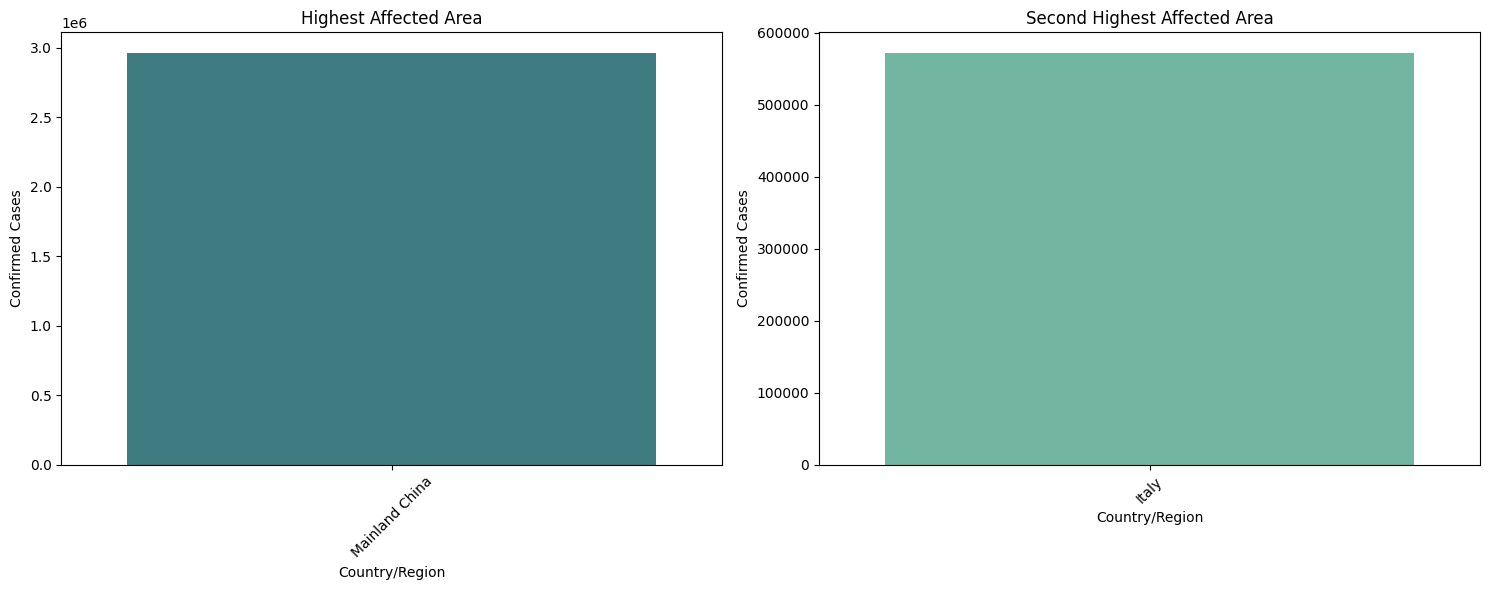

In [ ]:
# Exclude datetime columns for aggregation
numeric_col = ['Confirmed', 'Deaths', 'Recovered']

# Group by 'Country/Region' and 'Province/State', and aggregate the numeric columns
area_group = df.groupby(['Country/Region', 'Province/State'])[numeric_col].sum().reset_index()

# Finding the highest and second highest affected areas based on 'Confirmed' cases
highest_affected = area_group.sort_values(by='Confirmed', ascending=False).head(1)
second_highest_affected = area_group.sort_values(by='Confirmed', ascending=False).iloc[1:2]

print(f'Highest affected area is:\n{highest_affected}')
print(f'Second highest affected area is:\n{second_highest_affected}')

# Plotting the highest and second highest affected areas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting the highest affected area
sns.barplot(x='Country/Region', y='Confirmed', data=highest_affected, palette='crest', ax=axes[0])
axes[0].set_title('Highest Affected Area')
axes[0].set_xlabel('Country/Region')
axes[0].set_ylabel('Confirmed Cases')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the second highest affected area
sns.barplot(x='Country/Region', y='Confirmed', data=second_highest_affected, palette='Set2', ax=axes[1])
axes[1].set_title('Second Highest Affected Area')
axes[1].set_xlabel('Country/Region')
axes[1].set_ylabel('Confirmed Cases')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

ii) What is the mortality Vs. recovery ratio.

In [ ]:
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()
mortality_vs_recovery_ratio = total_deaths / total_recovered
print("Mortality vs. Recovery Ratio:", mortality_vs_recovery_ratio)

Mortality vs. Recovery Ratio: 0.10392256335788293


iii) Is there any general tendency towards particular age, gender or random?

Gender Distribution:
 gender
male       48.713060
female     35.367016
unknown    15.919924
Name: proportion, dtype: float64

Age Distribution:
 age
(35.0, 50.0]      39.656816
(50.0, 65.0]      25.357483
(18.0, 35.0]      17.445186
(65.0, 100.0]     14.775977
(-0.001, 18.0]     2.764538
Name: proportion, dtype: float64


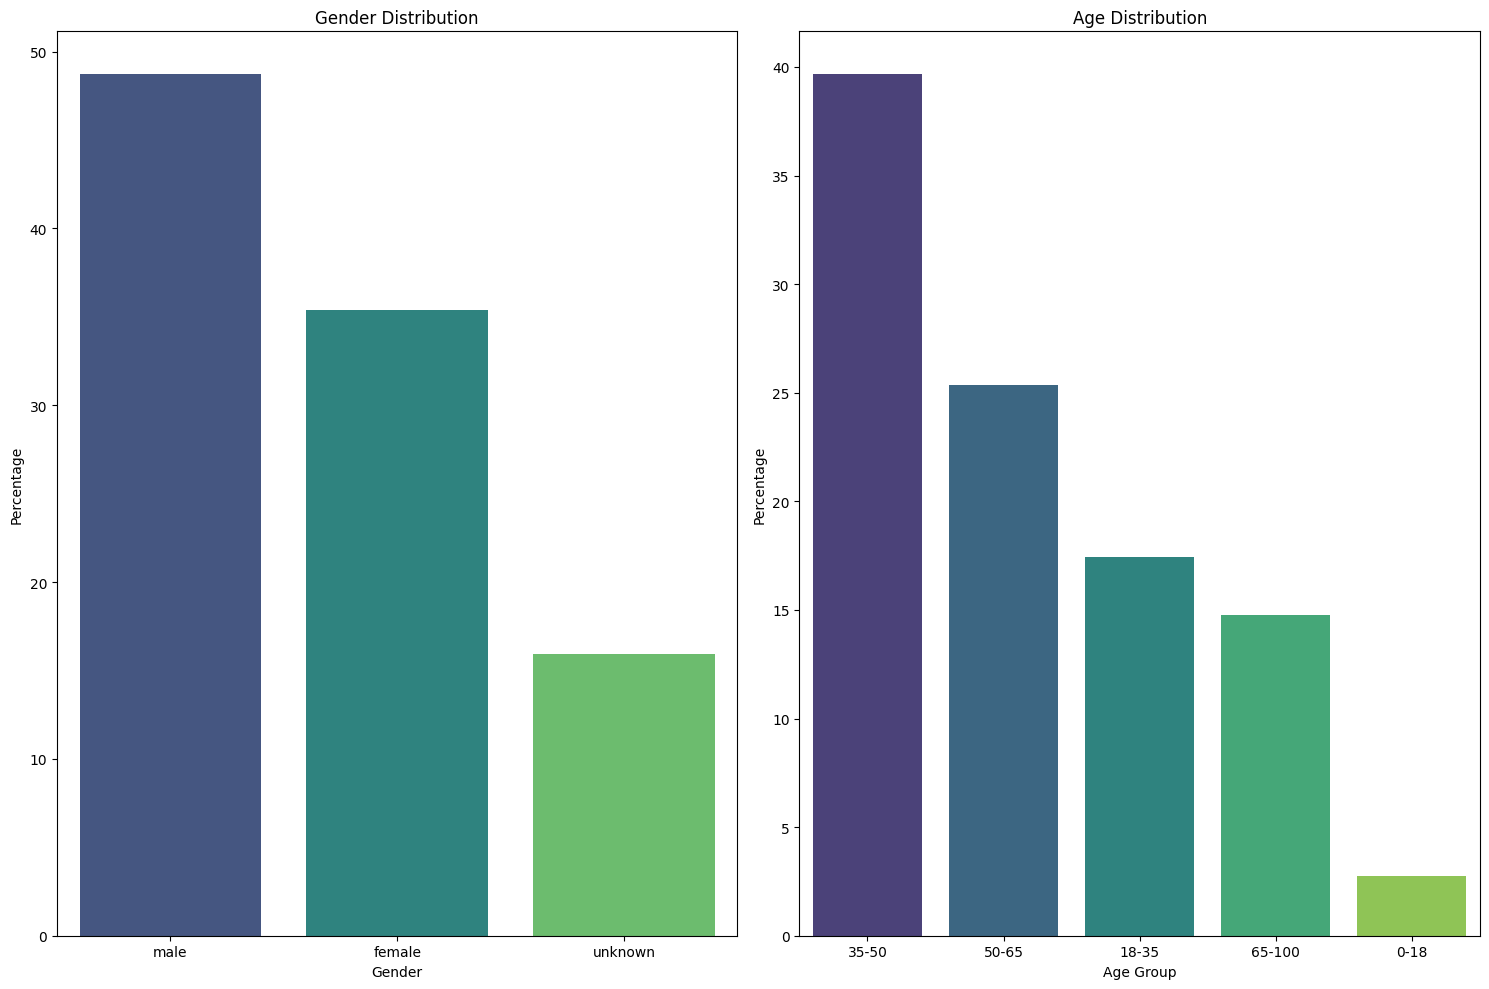

In [ ]:
# Calculate gender distribution
gender_distribution = patient_data['gender'].value_counts(normalize=True) * 100

# Calculate age distribution using bins
age_bins = [0, 18, 35, 50, 65, 100]
age_distribution = patient_data['age'].dropna().astype(int).value_counts(bins=age_bins, normalize=True) * 100

print("Gender Distribution:\n", gender_distribution)
print("\nAge Distribution:\n", age_distribution)

# Plotting gender and age distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Plotting gender distribution
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, ax=axes[0], palette='viridis')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Percentage')

# Plotting age distribution
# Convert age bins to string for better x-axis labeling
age_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in age_distribution.index]
sns.barplot(x=age_labels, y=age_distribution.values, ax=axes[1], palette='viridis')
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

iv) What is the mortality rate among different age groups?


Age Mortality Distribution:
 age
(65.0, 100.0]     71.428571
(50.0, 65.0]      21.428571
(35.0, 50.0]       7.142857
(-0.001, 18.0]     0.000000
(18.0, 35.0]       0.000000
Name: proportion, dtype: float64


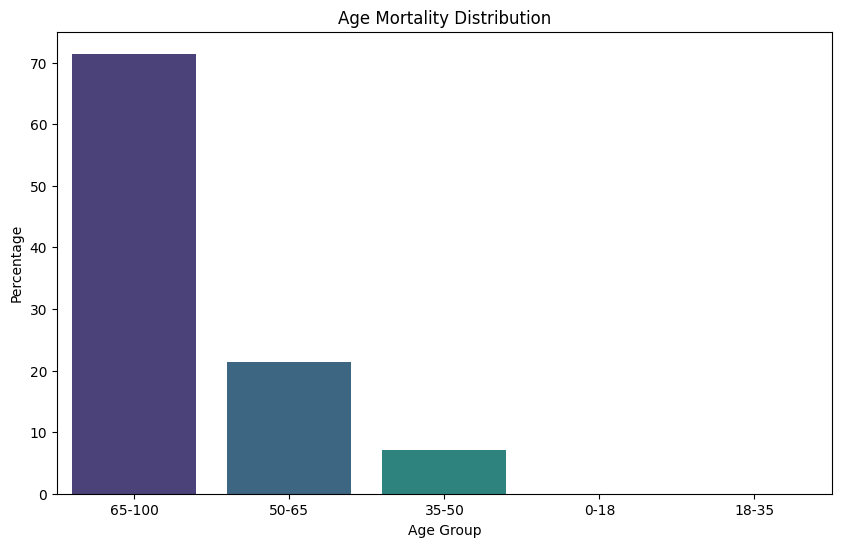

In [ ]:
# Filter the data for patients who have died
age_mortality = patient_data[patient_data['death'] == '1']

# Calculate age distribution of mortality using bins
age_bins = [0, 18, 35, 50, 65, 100]
age_mortality_distribution = age_mortality['age'].dropna().astype(int).value_counts(bins=age_bins, normalize=True) * 100

print("\nAge Mortality Distribution:\n", age_mortality_distribution)

# Plotting age mortality distribution
plt.figure(figsize=(10, 6))
# Convert age bins to string for better x-axis labeling
age_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in age_mortality_distribution.index]
sns.barplot(x=age_labels, y=age_mortality_distribution.values, palette='viridis')
plt.title('Age Mortality Distribution')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()

In [64]:
def display_menu():
    print("\nWelcome to COVID-19 Data Analysis CLI\n")
    print("1. Highest Affected Area")
    print("2. Second Highest Affected Area")
    print("3. Mortality vs. Recovery Ratio")
    print("4. Gender Distribution")
    print("5. Age Distribution")
    print("6. Age Mortality Distribution")
    print("0. Exit")

def highest_affected_area():
    print("\nHighest Affected Area:\n", highest_affected)

def second_highest_affected_area():
    print("\nSecond Highest Affected Area:\n", second_highest_affected)

def mortality_vs_recovery():
    print("\nMortality vs. Recovery Ratio:", mortality_vs_recovery_ratio)

def gender_distribution_stats():
    print("\nGender Distribution:\n", gender_distribution)

def age_distribution_stats():
    print("\nAge Distribution:\n", age_distribution)

def age_mortality_distribution_stats():
    print("\nAge Mortality Distribution:\n", age_mortality_distribution)

def main():
    while True:
        display_menu()
        choice = input("Enter your choice (0-6): ")
        if choice == '1':
            highest_affected_area()
        elif choice == '2':
            second_highest_affected_area()
        elif choice == '3':
            mortality_vs_recovery()
        elif choice == '4':
            gender_distribution_stats()
        elif choice == '5':
            age_distribution_stats()
        elif choice == '6':
            age_mortality_distribution_stats()
        elif choice == '0':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter a number between 0 and 6.")

if __name__ == "__main__":
    main()


Welcome to COVID-19 Data Analysis CLI

1. Highest Affected Area
2. Second Highest Affected Area
3. Mortality vs. Recovery Ratio
4. Gender Distribution
5. Age Distribution
6. Age Mortality Distribution
0. Exit
Enter your choice (0-6): 1

Highest Affected Area:
      Country/Region Province/State  Confirmed  Deaths  Recovered
174  Mainland China          Hubei    2962686  118057    1439722

Welcome to COVID-19 Data Analysis CLI

1. Highest Affected Area
2. Second Highest Affected Area
3. Mortality vs. Recovery Ratio
4. Gender Distribution
5. Age Distribution
6. Age Mortality Distribution
0. Exit
Enter your choice (0-6): 2

Second Highest Affected Area:
     Country/Region Province/State  Confirmed  Deaths  Recovered
141          Italy              0     571924   46856      59688

Welcome to COVID-19 Data Analysis CLI

1. Highest Affected Area
2. Second Highest Affected Area
3. Mortality vs. Recovery Ratio
4. Gender Distribution
5. Age Distribution
6. Age Mortality Distribution
0. Exit
E